In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

In [2]:
gt_list = sorted(glob.glob('./result/GT*.jpg'))
seg_list = sorted(glob.glob('./result/SEG*.jpg'))

print(len(gt_list), len(seg_list))

2000 2000


In [3]:
DSC_list = []
GT_sum = []

for i in range(len(gt_list)):
    
    GT = cv2.imread(gt_list[i], 0) / 255

    GT[GT > 0.5] = 1
    GT[GT <= 0.5] = 0

    AUTO = cv2.imread(seg_list[i], 0) / 255

    AUTO[AUTO > 0.5] = 1
    AUTO[AUTO <= 0.5] = 0

    A_Intersect_G = np.multiply(AUTO, GT)
            
    DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

    DSC_list.append(DSC)
    GT_sum.append(np.sum(GT))

print(len(DSC_list))

2000


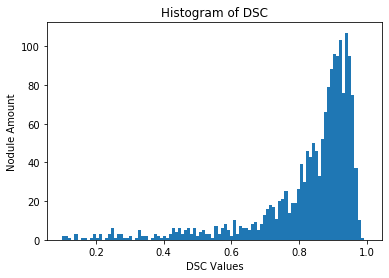

In [6]:
plt.hist(DSC_list, range=(0.1, 1), bins=100)

plt.xlabel('DSC Values')
plt.ylabel('Nodule Amount')
plt.title('Histogram of DSC')

plt.savefig('fig1.png', dpi=300)

plt.show()